#### Importing Libraries

In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import emoji

In [2]:
f = open('WhatsApp Chat with Over Reactors.txt', 'r', encoding = 'utf-8')

In [3]:
data = f.read()

In [4]:
print(data)

11/27/23, 10:16 - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.
11/27/23, 15:53 - Nirzari: Any up for dinner today? Mein aur harshavi fix hai
11/27/23, 16:21 - Niyati (Own): No
11/28/23, 19:23 - Harshavi: Coming
11/29/23, 18:52 - Dhrumi New: Utar rha hai koi?
11/29/23, 18:58 - Harshavi: 7:30
11/29/23, 18:59 - Dhrumi New: Okay
11/29/23, 19:38 - Dhrumi New: Utro
11/29/23, 19:54 - Nirzari: Thodi der mein
12/1/23, 19:35 - Kahan (Own): aaj koi neeche aa raha hai??
12/1/23, 21:17 - Stuti (owm): We are students from St. Xavier's College. The purpose of this survey is to take a step towards understanding why students are drawn towards pursuing a foreign education. The goal of conducting this survey is to highlight the issues surrounding quality education in India and reducing the 'Brain Drain Crisis'. We request you to please fill this form completely (that is, all questions applicable to you). Thank 

In [5]:
pattern = '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s'

In [6]:
messages = re.split(pattern, data)[1:]
len(messages)

1267

In [7]:
dates = re.findall(pattern, data)
dates

['11/27/23, 10:16 - ',
 '11/27/23, 15:53 - ',
 '11/27/23, 16:21 - ',
 '11/28/23, 19:23 - ',
 '11/29/23, 18:52 - ',
 '11/29/23, 18:58 - ',
 '11/29/23, 18:59 - ',
 '11/29/23, 19:38 - ',
 '11/29/23, 19:54 - ',
 '12/1/23, 19:35 - ',
 '12/1/23, 21:17 - ',
 '12/1/23, 21:18 - ',
 '12/2/23, 18:56 - ',
 '12/2/23, 19:04 - ',
 '12/4/23, 18:41 - ',
 '12/6/23, 18:59 - ',
 '12/6/23, 19:10 - ',
 '12/7/23, 07:45 - ',
 '12/7/23, 08:44 - ',
 '12/7/23, 09:15 - ',
 '12/7/23, 09:15 - ',
 '12/7/23, 09:16 - ',
 '12/7/23, 09:16 - ',
 '12/7/23, 09:17 - ',
 '12/7/23, 09:17 - ',
 '12/7/23, 09:18 - ',
 '12/7/23, 11:07 - ',
 '12/7/23, 18:38 - ',
 '12/7/23, 18:58 - ',
 '12/7/23, 19:12 - ',
 '12/7/23, 19:25 - ',
 '12/8/23, 19:52 - ',
 '12/9/23, 18:40 - ',
 '12/12/23, 12:02 - ',
 '12/12/23, 12:02 - ',
 '12/12/23, 12:02 - ',
 '12/12/23, 12:03 - ',
 '12/12/23, 12:03 - ',
 '12/12/23, 12:03 - ',
 '12/12/23, 13:12 - ',
 '12/12/23, 13:39 - ',
 '12/12/23, 13:44 - ',
 '12/12/23, 13:49 - ',
 '12/12/23, 13:51 - ',
 '12/12/23, 

In [8]:
df = pd.DataFrame({'user_message': messages, 'message_date': dates})
df['message_date'] = pd.to_datetime(df['message_date'], format='%m/%d/%y, %H:%M - ')
df.rename(columns = {'message_date': 'date'}, inplace = True)
df.head()

,user_message,date
0,Messages and calls are end-to-end encrypted. N...,2023-11-27 10:16:00
1,Nirzari: Any up for dinner today? Mein aur har...,2023-11-27 15:53:00
2,Niyati (Own): No\n,2023-11-27 16:21:00
3,Harshavi: Coming\n,2023-11-28 19:23:00
4,Dhrumi New: Utar rha hai koi?\n,2023-11-29 18:52:00


In [9]:
df.shape

(1267, 2)

In [10]:
users = []
messages = []
for message in df['user_message']:
    entry = re.split('([\w\W]+?):\s', message)
    if entry[1:]: # user name
        users.append(entry[1])
        messages.append(entry[2])
    else:
        users.append('group notification')
        messages.append(entry[0])
df['user'] = users
df['message'] = messages
df.drop(columns = ['user_message'], inplace = True)

In [11]:
df

,date,user,message
0,2023-11-27 10:16:00,group notification,Messages and calls are end-to-end encrypted. N...
1,2023-11-27 15:53:00,Nirzari,Any up for dinner today? Mein aur harshavi fix...
2,2023-11-27 16:21:00,Niyati (Own),No\n
3,2023-11-28 19:23:00,Harshavi,Coming\n
4,2023-11-29 18:52:00,Dhrumi New,Utar rha hai koi?\n
...,...,...,...
1262,2024-03-30 19:23:00,Kahan (Own),Hiii\n
1263,2024-03-30 19:23:00,Kahan (Own),Koi neeche aa raha hai??\n
1264,2024-03-30 19:49:00,Tanisha,Shayad😂\n
1265,2024-03-30 20:11:00,Harshavi,Koi as raha haï 9/9:30?\n


In [12]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month_name()
df['day'] = df['date'].dt.day
df['hour'] = df['date'].dt.hour
df['minute'] = df['date'].dt.minute

In [13]:
df.head()

,date,user,message,year,month,day,hour,minute
0,2023-11-27 10:16:00,group notification,Messages and calls are end-to-end encrypted. N...,2023,November,27,10,16
1,2023-11-27 15:53:00,Nirzari,Any up for dinner today? Mein aur harshavi fix...,2023,November,27,15,53
2,2023-11-27 16:21:00,Niyati (Own),No\n,2023,November,27,16,21
3,2023-11-28 19:23:00,Harshavi,Coming\n,2023,November,28,19,23
4,2023-11-29 18:52:00,Dhrumi New,Utar rha hai koi?\n,2023,November,29,18,52


In [14]:
total_messages = df.shape[0]
total_messages

1267

In [15]:
if (df['user'] == 'Kahan (Own)').sum() > 0:
        total_messages = (df['user'] == 'Kahan (Own)').sum()
total_messages

268

In [16]:
words = []
for message in df['message']:
    words.extend(message.split())

In [17]:
len(words)

5597

In [18]:
from urlextract import URLExtract
extractor = URLExtract()
y = []
for message in df['message']:
    y.extend(extractor.find_urls(message))

In [19]:
len(y)

16

<BarContainer object of 5 artists>

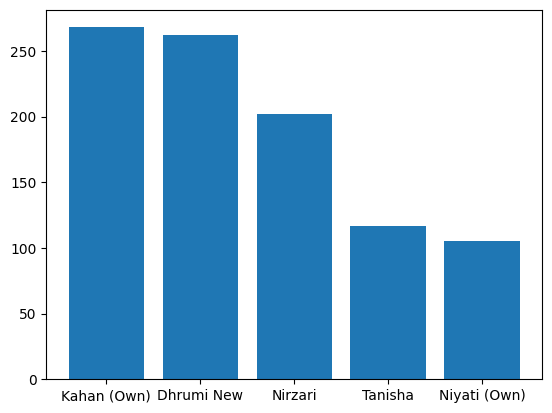

In [20]:
x = df['user'].value_counts().head()
name = x.index
count = x.values
plt.bar(name,count)

In [21]:
x = round((df['user'].value_counts().head() / df.shape[0]) * 100, 2).reset_index().rename(columns = {'index':'User Name', 'user': 'Active Percentage'})
x

,User Name,Active Percentage
0,Kahan (Own),21.15
1,Dhrumi New,20.68
2,Nirzari,15.94
3,Tanisha,9.23
4,Niyati (Own),8.29


In [22]:
temp = df[df['user'] != 'group notification']
temp = temp[temp['message'] != '<Media omitted>\n']

In [23]:
f = open('stop_hinglish.txt','r')
stop_words = f.read()
# print(stop_words)

In [24]:
words = []
for message in temp['message']:
    for word in message.lower().split():
        if word not in stop_words:
            words.append(word)

In [25]:
from collections import Counter
pd.DataFrame(Counter(words).most_common(20)).head()

,0,1
0,call,28
1,happy,25
2,message,23
3,birthday,22
4,😂,21


In [26]:
emojis = []
for message in df['message']:
    emojis.extend([e['emoji'] for e in emoji.emoji_list(message)])

In [27]:
pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis)))).head()

,0,1
0,😂,153
1,🥳,22
2,😭,13
3,✨,13
4,😒,12


In [28]:
df['month_num'] = df['date'].dt.month

In [29]:
timeline = df.groupby(['year', 'month_num', 'month']).count()['message'].reset_index()

In [30]:
time = []
for i in range(timeline.shape[0]):
    time.append(timeline['month'][i] + "-" + str(timeline['year'][i]))

In [31]:
timeline['time'] = time

In [32]:
timeline

,year,month_num,month,message,time
0,2023,11,November,9,November-2023
1,2023,12,December,541,December-2023
2,2024,1,January,73,January-2024
3,2024,2,February,255,February-2024
4,2024,3,March,389,March-2024


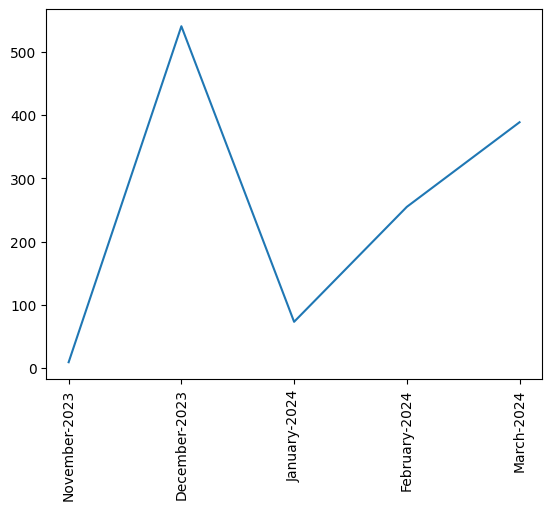

In [33]:
plt.plot(timeline['time'], timeline['message'])
plt.xticks(rotation = 'vertical')
plt.show()